# Homework 6

TFCB 2022

Due date: Nov 17, 2022 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [2]:
library(tidyverse)

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!` - Not Function: means the opposite of the code that follows (from:[https://itsalocke.com/blog/learn-to-r-blog-series](https://itsalocke.com/blog/learn-to-r-blog-series---operators-and-objects/#:~:text=The%20exclamation%20point%20(%20!%20),that%20check%20not%20true%3F%E2%80%9D.))
2. `is.na` - Returns TRUE when there are missing values (NA) in a data, FALSE if no missing values. (from:[https://statisticsglobe.com/r-is-na-function/](https://statisticsglobe.com/r-is-na-function/))
3. `is.numeric` - Returns TRUE if its argument is a numeric number, FALSE if not numberic number. (from:[https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/numeric](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/numeric))
4. `anti_join` - This function `anti_join(x, y,...)` filters the input and returns all rows from x without a match in y. (from:[https://dplyr.tidyverse.org/reference/filter-joins.html](https://dplyr.tidyverse.org/reference/filter-joins.html))
5. `desc` - Transforms a list of things so that it can be sorted in descending order.(from:[https://dplyr.tidyverse.org/reference/desc.html](https://dplyr.tidyverse.org/reference/desc.html))
6. `dplyr::slice` - Subset dataset rows based on position.(from:[https://dplyr.tidyverse.org/reference/slice.html](https://dplyr.tidyverse.org/reference/slice.html))
7. `dplyr::across` - helps apply a function/multiple functions to multiple columns.(from:[https://dplyr.tidyverse.org/reference/across.html](https://dplyr.tidyverse.org/reference/across.html))


## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [14]:
#read in tsv file and name it annotations
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
  #select only specific columns from the data set
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
  #filter out any rows with NA in the ccds_id column
  filter(!is.na(ccds_id)) %>%
  #print the data set
  print()

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 19229 Columns: 54
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (39): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (3): entrez_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 18,785 × 5
   ensembl_gene_id symbol  name                               gene_group ccds_id
   <chr>           <chr>   <chr>                              <chr>      <chr>  
 1 ENSG00000121410 A1BG    alpha-1-B glycoprotein             Immunoglo… CCDS12…
 2 ENSG00000148584 A1CF    APOBEC1 complementation factor     RNA bindi… CCDS72…
 3 ENSG00000175899 A2M     alpha-2-macroglobulin              Alpha-2-m… CCDS44…
 4 ENSG00000166535 A2ML1   alpha-2-macroglobulin like 1       Alpha-2-m… CCDS85…
 5 ENSG00000184389 A3GALT2 alpha 1,3-galactosyltransferase 2  Glycosylt… CCDS60…
 6 ENSG00000128274 A4GALT  alpha 1,4-galactosyltransferase (… Alpha 1,4… CCDS14…
 7 ENSG00000118017 A4GNT   alpha-1,4-N-acetylglucosaminyltra… Alpha 1,4… CCDS30…
 8 ENSG00000094914 AAAS    aladin WD repeat nucleoporin       WD repeat… CCDS53…
 9 ENSG00000081760 AACS    acetoacetyl-CoA synthetase         Acyl-CoA … CCDS92…
10 ENSG00000114771 AADAC   arylacetamide deacetylase          Lipases|A… CCDS33…
# … w

In [15]:
#read in tsv file and name it data
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
  #rename column ENSEMBL gene to ensembl_gene_id
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  #print the data set
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

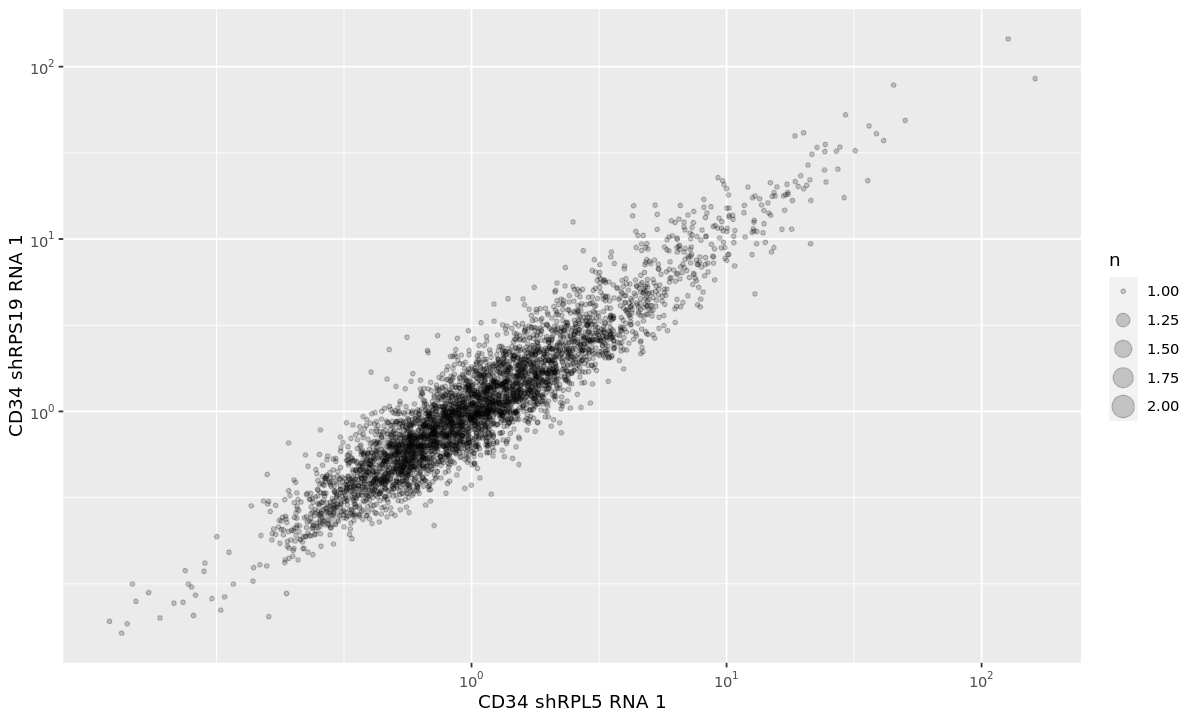

In [13]:
data %>%
  #select the two columns from data
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  #drop rows with NA
  drop_na %>%
  #filter out zeros to eliminate log10(0) errors
  filter(CD34_shRPL5_RNA_1 != 0 & CD34_shRPS19_RNA_1 != 0) %>%
  #plot data
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  #use geom_count to count the # of observations at each location with transparency of 0.2
  geom_count(alpha = 0.2) +
  #scale axes to log10 & rename, setting axes break marks and labels
  scale_x_log10('CD34 shRPL5 RNA 1', 
    breaks = c(1, 10, 100, 1000, 10000, 100000),
    label = c(expression('10'^0), expression('10'^1), expression('10'^2), expression('10'^3), expression('10'^4), expression('10'^5)))+
  scale_y_log10('CD34 shRPS19 RNA 1', 
    breaks = c(1, 10, 100, 1000, 10000, 100000),
    label = c(expression('10'^0), expression('10'^1), expression('10'^2), expression('10'^3), expression('10'^4), expression('10'^5)))

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [6]:
#reassign back to data
data <- data %>%
    #selected columns and those containing specific terms 
    select(ensembl_gene_id, matches('RPL5|RPS19|Luc'))

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [7]:
#reassign back to data
data <- data %>%
    #filtered rows that start with CD34 w/ values > or = to 50
    filter(if_all(starts_with('CD34'), ~ . >= 50))#used if_all instead of across to get rid of warning

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [8]:
#reassign back to data
data <- data %>%
    #using mutate normalize columns that start with CD34. Divide each value in column by the column's median
    mutate(across(starts_with('CD34'), ~(./median(.))))

## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [9]:
#assign result to new lfc dataframe
lfc <- data %>%
  #add column of mean RP15 translation efficiency, with calculations of average RPF/ average RNA
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>%
  #add column of mean RPS19 translation efficiency, with calculations of average RPF/ average RNA
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>%
  #add column, mean Luc translation efficiency, with calculations of average RPF/ average RNA
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%
  #pick relevant columns
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
  #add columns w/ log2 normalized RPL5 and RPS19 values
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te), 
         lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>%
  #print table
  print()

# A tibble: 4,239 × 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.919         1.49          1.08       -0.239
 2 ENSG00000001036        1.17          1.11          1.45       -0.316
 3 ENSG00000001084        1.02          1.14          0.853       0.258
 4 ENSG00000001497        1.38          1.04          1.75       -0.338
 5 ENSG00000002549        1.78          1.87          1.50        0.245
 6 ENSG00000002586        0.903         0.825         1.14       -0.331
 7 ENSG00000002834        0.479         0.394         0.519      -0.115
 8 ENSG00000003056        1.87          1.87          1.02        0.882
 9 ENSG00000003393        0.831         1.20          0.462       0.847
10 ENSG00000003402        0.505         0.427         0.344       0.552
# … with 4,229 more rows, and 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [10]:
#assign result to new mean lfc dataframe
mean_lfc <- lfc %>%
    #add column of average lfc, average of RPL5 and RPS19 lfc translational efficiency
    mutate(avg_lfc = (lfc_te_rpl5+lfc_te_rps19)/2) %>%
    #pick relevant columns
    select(ensembl_gene_id, avg_lfc)


## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [11]:
#reassign result back to mean lfc dataframe
mean_lfc <- mean_lfc %>%
  #join data from mean_lfc and annotations by ensembl_gene_id keeping only rows that both match the ensembl_gene_id
  inner_join(annotations, by='ensembl_gene_id')

## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

# A tibble: 10 × 3
   symbol name                                       avg_lfc
   <chr>  <chr>                                        <dbl>
 1 H2AC6  H2A clustered histone 6                      -2.95
 2 H2BC12 H2B clustered histone 12                     -2.79
 3 RPS15  ribosomal protein S15                        -2.27
 4 COX8A  cytochrome c oxidase subunit 8A              -2.02
 5 RPL18A ribosomal protein L18a                       -2.01
 6 RPLP1  ribosomal protein lateral stalk subunit P1   -2.01
 7 H2AX   H2A.X variant histone                        -1.86
 8 RPS26  ribosomal protein S26                        -1.85
 9 APOE   apolipoprotein E                             -1.68
10 RPL7A  ribosomal protein L7a                        -1.68


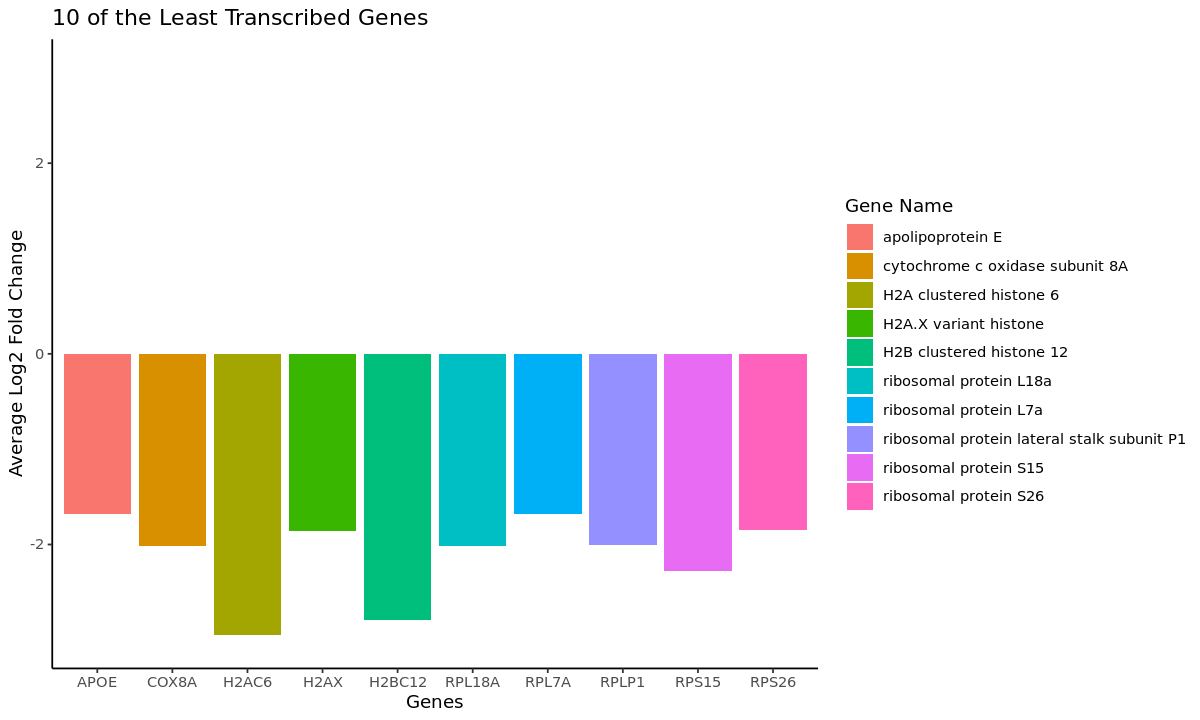

In [12]:
# received help on this problem From Lucy Li


options(repr.plot.width = 10, repr.plot.height = 6)
mean_lfc %>%
  #order rows from lowest to highest avg_lfc value
  arrange(avg_lfc) %>%
  #select lowest 10 values
  slice(1:10) %>%
  select(symbol, name, avg_lfc) %>%
  #print selected table symbol, gene name and average LFC
  print () %>%
  #plot as bar graph with title and axis labels and bar color as gene name
  ggplot(aes(symbol, avg_lfc, fill=name)) +
  geom_col() +
  labs(title='10 of the Least Transcribed Genes', x='Genes', y='Average Log2 Fold Change', fill = 'Gene Name') +
  #make y axis between -3 and 3
  scale_y_continuous(limit = c(-3, 3)) +
  #make theme classic
  theme_classic()
#geom_col to make the heights of the bars to represent values in the data.
#fill in the ggplot(aes) in order to color the bars and correspond them to a gene name and renamed the legend to Gene Name.
#y-axis -4 to 4 using limit in scale_y_continuous.
#Changed the theme to classic